In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# !pip install keras tensorflow

    100% |████████████████████████████████| 109.2MB 403kB/s eta 0:00:01   35% |███████████▍                    | 38.8MB 49.5MB/s eta 0:00:02
    100% |████████████████████████████████| 112kB 40.4MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 30.4MB/s ta 0:00:01
    100% |████████████████████████████████| 3.2MB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 2.3MB 18.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.3MB 22.3MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 20.7MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 30.3MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 32.0MB/s ta 0:00:01
    100% |████████████████████████████████| 327kB 28.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /root/.cache/pip/wheels/a7/15/a0/0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
  Running setup.py bdist_wheel for wrapt ... done
  Stored in directory:

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, SimpleRNN

Using TensorFlow backend.
/opt/conda/envs/fastai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/fastai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/fastai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/fastai/lib/python3.6/site-packages/tenso

In [ ]:
# !tar -xzvf data/nba.tar.gz -C data/

In [9]:
df = pd.read_csv('data/nba.csv')
df.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season
0,2018-19,1627215,Walter Lemon Jr.,1610612741,CHI,Chicago Bulls,21801224,2019-04-10,CHI @ PHI,L,...,0,3,2,1,20,-7,31.2,0,0,2018-19
1,2018-19,203210,JaMychal Green,1610612746,LAC,LA Clippers,21801229,2019-04-10,LAC vs. UTA,W,...,1,3,5,2,13,5,18.9,0,0,2018-19
2,2018-19,1628396,Tony Bradley,1610612762,UTA,Utah Jazz,21801229,2019-04-10,UTA @ LAC,L,...,2,0,4,1,15,-9,38.5,1,0,2018-19
3,2018-19,203471,Dennis Schroder,1610612760,OKC,Oklahoma City Thunder,21801226,2019-04-10,OKC @ MIL,W,...,0,0,5,4,32,14,52.5,0,0,2018-19
4,2018-19,203115,Will Barton,1610612743,DEN,Denver Nuggets,21801228,2019-04-10,DEN vs. MIN,W,...,1,0,1,1,10,9,31.8,0,0,2018-19


In [10]:
curry = df[df['PLAYER_NAME']=='Stephen Curry']
curry = curry.assign(date=pd.to_datetime(curry['GAME_DATE']))
curry.sort_values(by=['date'], inplace=True)
curry = curry.reset_index(drop=True)

In [11]:
curry.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season,date
0,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900015,2009-10-28,GSW vs. HOU,L,...,1,2,2,14,7,36.9,0,0,2009-10,2009-10-28
1,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900030,2009-10-30,GSW @ PHX,L,...,1,5,4,12,-19,20.4,0,0,2009-10,2009-10-30
2,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900069,2009-11-04,GSW vs. MEM,W,...,0,4,0,7,-4,31.5,0,0,2009-10,2009-11-04
3,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900082,2009-11-06,GSW vs. LAC,L,...,0,6,4,5,-13,10.7,0,0,2009-10,2009-11-06
4,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900096,2009-11-08,GSW @ SAC,L,...,1,4,3,9,-5,17.8,0,0,2009-10,2009-11-08


In [12]:
curry.tail()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season,date
689,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801164,2019-04-02,GSW vs. DEN,W,...,0,4,4,17,25,34.3,0,0,2018-19,2019-04-02
690,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801179,2019-04-04,GSW @ LAL,W,...,1,1,2,7,32,30.5,0,0,2018-19,2019-04-04
691,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801191,2019-04-05,GSW vs. CLE,W,...,0,1,4,40,5,56.7,0,0,2018-19,2019-04-05
692,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801205,2019-04-07,GSW vs. LAC,W,...,1,3,1,27,35,45.0,0,0,2018-19,2019-04-07
693,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801215,2019-04-09,GSW @ NOP,W,...,0,0,0,5,1,5.7,0,0,2018-19,2019-04-09


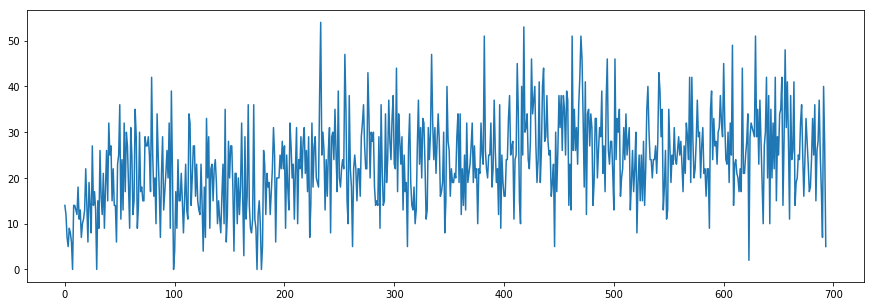

In [13]:
curry['PTS'].plot(figsize=(15,5))

In [15]:
#export
def mae(pred, targ): return (pred-targ).abs().mean()

def normalize(x,m,s):
    return (x-m)/s

def denormalize(x,m,s):
    return (x*s)+m

In [16]:
#export
def create_ts_dataset(data, lookback=10):
    xs,ys = [],[]
    for i in range(lookback, len(data)):
        xs.append(data[i-lookback:i])
        ys.append(data[i])
    X = np.array(xs)
    y = np.array(ys)
    return X, y

In [26]:
pts = np.array(curry['PTS'])

In [27]:
split = int(.7*len(pts)); split

485

In [28]:
train = pts[:split]
test = pts[split:]

In [29]:
m = train.mean()
s = train.std()
train = normalize(train, m, s)
test = normalize(test, m, s)

In [30]:
m,s

(22.25979381443299, 9.805244334147563)

In [31]:
train.shape, test.shape

((485,), (209,))

In [32]:
X_train, y_train = create_ts_dataset(train)
X_test, y_test = create_ts_dataset(test)

In [33]:
X_train.shape, y_train.shape

((475, 10), (475,))

In [34]:
X_test.shape, y_test.shape

((199, 10), (199,))

In [35]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [36]:
X_train.shape, X_test.shape

((475, 10, 1), (199, 10, 1))

In [40]:
# simple RNN
model = Sequential()
model.add(SimpleRNN(5, input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Train on 475 samples, validate on 199 samples
Epoch 1/100
475/475 [==============================] - 1s 1ms/step - loss: 0.8654 - val_loss: 0.7884
Epoch 2/100
475/475 [==============================] - 0s 449us/step - loss: 0.8326 - val_loss: 0.7600
Epoch 3/100
475/475 [==============================] - 0s 448us/step - loss: 0.8091 - val_loss: 0.7393
Epoch 4/100
475/475 [==============================] - 0s 440us/step - loss: 0.7931 - val_loss: 0.7226
Epoch 5/100
475/475 [==============================] - 0s 446us/step - loss: 0.7820 - val_loss: 0.7116
Epoch 6/100
475/475 [==============================] - 0s 427us/step - loss: 0.7748 - val_loss: 0.7053
Epoch 7/100
475/475 [==============================] - 0s 423us/step - loss: 0.7696 - val_loss: 0.7015
Epoch 8/100
475/475 [==============================] - 0s 433us/step - loss: 0.7657 - val_loss: 0.6989
Epoch 9/100
475/475 [==============================] - 0s 418us/step - loss: 0.7627 - val_loss: 0.6978
Epoch 10/100
475/475 [======

475/475 [==============================] - 0s 416us/step - loss: 0.7311 - val_loss: 0.6963
Epoch 78/100
475/475 [==============================] - 0s 418us/step - loss: 0.7315 - val_loss: 0.6957
Epoch 79/100
475/475 [==============================] - 0s 445us/step - loss: 0.7306 - val_loss: 0.6977
Epoch 80/100
475/475 [==============================] - 0s 437us/step - loss: 0.7299 - val_loss: 0.6933
Epoch 81/100
475/475 [==============================] - 0s 421us/step - loss: 0.7314 - val_loss: 0.6957
Epoch 82/100
475/475 [==============================] - 0s 432us/step - loss: 0.7330 - val_loss: 0.6979
Epoch 83/100
475/475 [==============================] - 0s 424us/step - loss: 0.7303 - val_loss: 0.6963
Epoch 84/100
475/475 [==============================] - 0s 470us/step - loss: 0.7305 - val_loss: 0.6979
Epoch 85/100
475/475 [==============================] - 0s 484us/step - loss: 0.7305 - val_loss: 0.6952
Epoch 86/100
475/475 [==============================] - 0s 435us/step - loss:

In [41]:
preds = model.predict(X_test)

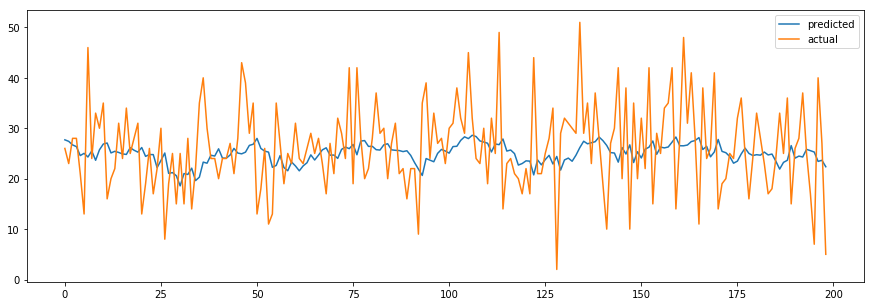

In [48]:
test_df = pd.DataFrame({'predicted':denormalize(preds.ravel(),m,s), 'actual':denormalize(y_test,m,s)})
test_df.plot(figsize=(15,5))

In [49]:
mae(test_df['predicted'], test_df['actual'])

6.885084765640335

In [50]:
mae(test_df['actual'].shift().ewm(alpha=0.1).mean(), test_df['actual'])

6.925387025953091

In [51]:
#export
def get_sin():
    return np.sin(np.arange(50,step=0.1))

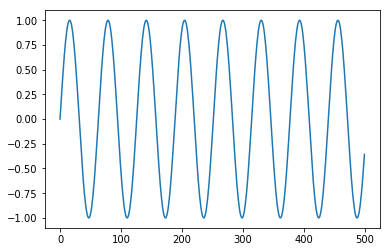

In [54]:
plt.plot(get_sin())

In [56]:
# !python notebook2script.py keras_rnn.ipynb

Converted keras_rnn.ipynb to exp/nb_keras.py
